In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras import Input
from tensorflow.keras import Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Flatten
import numpy as np
from keras.layers import Reshape
from keras.layers import Conv2DTranspose


from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Input
from tensorflow.keras import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Flatten
from keras.layers import Reshape
import numpy as np
from keras.layers import Conv2DTranspose

In [ ]:
(x_train,_),(x_test,_)=fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train1=x_train/255
x_test1=x_test/255


In [ ]:
x_train1=np.expand_dims(x_train1,axis=-1)


In [ ]:
x_train1.shape

(60000, 28, 28, 1)

In [ ]:
x_test1=np.expand_dims(x_test1,axis=-1)
x_test1.shape

(10000, 28, 28, 1)

In [ ]:
def autoencoder(input_shape=(28,28,1),enco_size=32,alpha=.02):
  input=Input(shape=input_shape)
  encode=Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same')(input)
  encode=LeakyReLU(alpha=alpha)(encode)
  encode=BatchNormalization()(encode)
  encode=Conv2D(filters=64,kernel_size=(3,3),strides=2,padding='same')(encode)
  encode=LeakyReLU(alpha=alpha)(encode)
  encode=BatchNormalization()(encode)
  #define output for encoder
  out_shape=encode.shape
  encode=Flatten()(encode)
  out=Dense(enco_size)(encode)
  model=Model(input,out)
  #decoder
  decoder_input=Input(shape=(enco_size,))
  target_shape=tuple(out_shape[1:])
  decoder=Dense(np.prod(target_shape))(decoder_input)
  decoder=Reshape(target_shape)(decoder)
  decoder=Conv2DTranspose(filters=64,kernel_size=(3,3),strides=2,padding='same')(decoder)
  decoder=LeakyReLU(alpha=alpha)(decoder)
  decoder=BatchNormalization()(decoder)
  decoder=Conv2DTranspose(filters=32,kernel_size=(3,3),strides=2,padding='same')(decoder)
  decoder=LeakyReLU(alpha=alpha)(decoder)
  decoder=BatchNormalization()(decoder)
  #define output for decoder
  decoder_out=Conv2DTranspose(filters=1,kernel_size=(3,3),padding='same',activation="sigmoid")(decoder)
  decoder_model=Model(decoder_input,decoder_out)
  #define auto encoder
  encoded_model_output=model(input)
  decoded_model_output=decoder_model(encoded_model_output)
  auto=Model(input,decoded_model_output)
  return model,decoder_model,auto




In [ ]:
encoder,decoder,autoencoder=autoencoder(enco_size=256)

In [ ]:
autoencoder.compile(optimizer="adam",loss="mse")

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                             

In [ ]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense_1 (Dense)             (None, 3136)              805952    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                           

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 256)               822272    
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         862017    
                                                                 
Total params: 1,684,289
Trainable params: 1,683,905
Non-trainable params: 384
_________________________________________________________________


In [ ]:
history=autoencoder.fit(x_train1,x_train1,epochs=150,batch_size=1024,validation_data=(x_test1,x_test1))

Epoch 1/150
59/59 [==============================] - 20s 154ms/step - loss: 0.0436 - val_loss: 0.1128
Epoch 2/150
59/59 [==============================] - 8s 138ms/step - loss: 0.0157 - val_loss: 0.1082
Epoch 3/150
59/59 [==============================] - 8s 137ms/step - loss: 0.0106 - val_loss: 0.0942
Epoch 4/150
59/59 [==============================] - 8s 137ms/step - loss: 0.0085 - val_loss: 0.0796
Epoch 5/150
59/59 [==============================] - 8s 137ms/step - loss: 0.0069 - val_loss: 0.0607
Epoch 6/150
59/59 [==============================] - 8s 137ms/step - loss: 0.0060 - val_loss: 0.0389
Epoch 7/150
59/59 [==============================] - 8s 137ms/step - loss: 0.0053 - val_loss: 0.0245
Epoch 8/150
59/59 [==============================] - 8s 137ms/step - loss: 0.0048 - val_loss: 0.0148
Epoch 9/150
59/59 [==============================] - 8s 139ms/step - loss: 0.0044 - val_loss: 0.0074
Epoch 10/150
59/59 [==============================] - 8s 137ms/step - loss: 0.0041 - val_l

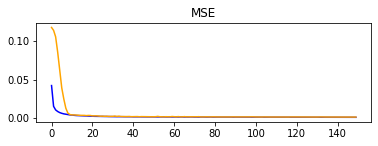

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title("MSE")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")

In [ ]:
#Sending info
x_test[0].shape

(28, 28)

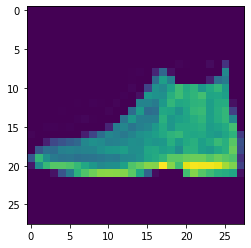

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])

In [ ]:
#Plot Sending Information

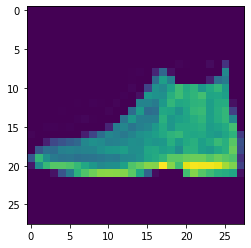

In [ ]:
plt.imshow(x_test[0])

In [ ]:
x_test1[0].shape

(28, 28, 1)

In [ ]:
img=x_test1[0]
img=img.reshape(1,28,28,1)
encoded_data=encoder.predict(img)
encoded_data=encoded_data.reshape(16,16)

In [ ]:
encoded_data.shape

(16, 16)

Endoded data Plot


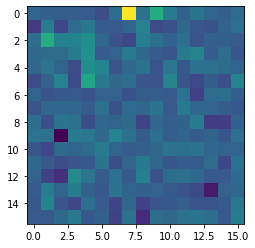

In [ ]:
print("Endoded data Plot")
plt.imshow(encoded_data)

In [ ]:
def Cover_encoder(encoder,img1,path_cover_img):
  img1=img1.reshape(1,28,28,1)
  k2=encoder.predict(img1)
  k2=k2.T
  k2=k2.flatten()
  k2=np.pad(k2, (0,9744), 'constant')
  img=load_img(path_cover_img,grayscale=True,target_size=(100,100))
  from keras.preprocessing.image import img_to_array
  img1=img_to_array(img)
  img1=img1.reshape(10000,1)
  img1=img1.flatten()
  img2=img1+k2
  img3=img2.reshape(100,100,1)
  from keras.preprocessing.image import array_to_img
  img3=array_to_img(img3)
  return img3

In [ ]:
path="/content/a.jpg"

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


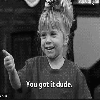

In [ ]:
load_img(path,grayscale=True,target_size=(100,100))


In [ ]:
send_data=Cover_encoder(encoder,x_test1[0],path)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


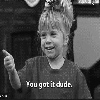

In [ ]:
send_data

In [ ]:
def receive_info(decoder,path,send_data):
  from keras.preprocessing.image import img_to_array
  k=img_to_array(send_data)
  img1=k.reshape(10000,1)
  img1=img1.flatten()
  img=load_img(path,grayscale=True,target_size=(100,100))
  img2=img_to_array(img)
  img2=img2.reshape(10000,1)
  img2=img2.flatten()
  k1=img1-img2
  k2=k1[0:256]
  k2= np.reshape(k2, (256,1))
  k2=k2.T
  k3=decoder.predict(k2)
  k3=k3.reshape(28,28)
  return k3


In [ ]:
k4=receive_info(decoder,path,send_data)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Received Data


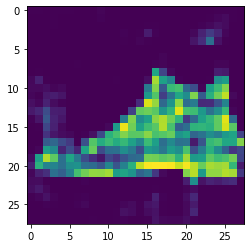

In [ ]:
print("Received Data")
plt.imshow(k4)